In [37]:
import pandas as pd
import numpy as np
from models.KNN import KNN
from confMatr import ConfusionMatrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv("task_data.csv")
data.drop(['ID', 'xx', 'yy', 'xy'], axis=1, inplace=True)
data.head()

,Cardiomegaly,Heart width,Lung width,CTR - Cardiothoracic Ratio,normalized_diff,Inscribed circle radius,Polygon Area Ratio,Heart perimeter,Heart area,Lung area
0,0,172,405,"0,424691358",-0.304239,"68,8186",0.213446,"679,4873689",24898,75419
1,1,159,391,"0,4066496164",-0.539387,"73,92564",0.203652,"788,6589419",29851,94494
2,0,208,400,"0,52",-0.371163,"69,33974",0.320787,"862,3229369",33653,66666
3,1,226,435,"0,5195402299",-0.419123,"84,14868",0.317545,"906,724959",42018,82596
4,1,211,420,"0,5023809524",-0.393442,"73,78347",0.263542,"864,2396777",35346,85631


In [39]:
#casting str to float
for col in data.columns:
  if isinstance(data[col][1], str):
    data[col] = data[col].map(lambda x: float(x.replace(',', '.')))

#normalizing inputs
for col in data.columns:
  maksimum = max(data[col])
  minimum = min(data[col])
  data[col] = data[col].map(lambda x: (x-minimum)/(maksimum-minimum))


In [40]:
#confusion matrixes for diffrent methods of calculating distance(for comparision)
cfm_hamming = ConfusionMatrix()
cfm_euclidean = ConfusionMatrix()
cfm_manhattan = ConfusionMatrix()
cfm_chebyshev = ConfusionMatrix()
knn = KNN(k=6)  #initializing KNN with k=6 neighbors

#evaluating the solution with cross validation
kf = KFold(5, shuffle=True)
for train_id, test_id in kf.split(data):
  knn.fit(np.array(data.loc[train_id]))
  #calculating TP, TN, FP, FN
  for point in np.array(data.loc[test_id]):
    cfm_hamming.evaluate(knn.predict(np.array(point[1:]), KNN.hamming), point[0])
    cfm_manhattan.evaluate(knn.predict(np.array(point[1:]), KNN.manhattan), point[0])
    cfm_euclidean.evaluate(knn.predict(np.array(point[1:])), point[0])
    cfm_chebyshev.evaluate(knn.predict(np.array(point[1:]), KNN.chebyshev), point[0])

cfm_hamming.print_all("Using Hamming: ")
cfm_euclidean.print_all("Using Euclidean ")
cfm_manhattan.print_all("Using manhattan: ")
cfm_chebyshev.print_all("Using chebyshev: ")

Using Hamming:  Accuracy: 0.5405405405405406 Precision: 0.5 Recall: 0.8235294117647058 F1-score: 0.6222222222222222
Using Euclidean  Accuracy: 0.7027027027027027 Precision: 0.8214285714285714 Recall: 0.7931034482758621 F1-score: 0.8070175438596492
Using manhattan:  Accuracy: 0.7297297297297297 Precision: 0.8214285714285714 Recall: 0.8214285714285714 F1-score: 0.8214285714285714
Using chebyshev:  Accuracy: 0.6486486486486487 Precision: 0.7857142857142857 Recall: 0.7586206896551724 F1-score: 0.7719298245614034


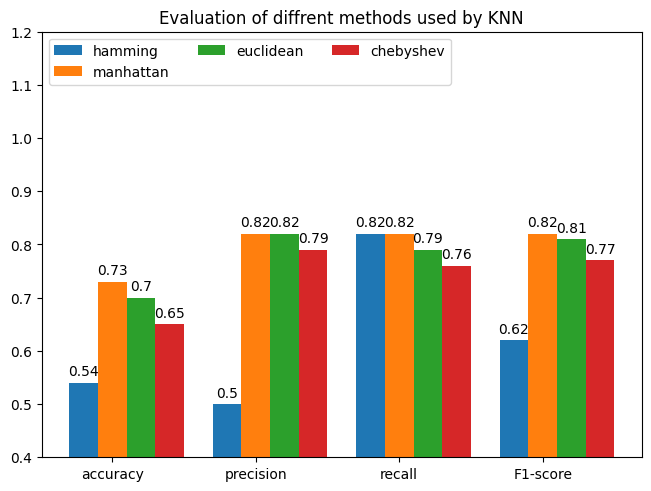

In [41]:
names = ['accuracy', 'precision', 'recall', 'F1-score']
values = {
  "hamming" : (cfm_hamming.accuracy,cfm_hamming.precision,cfm_hamming.recall, cfm_hamming.F1_score),
  "manhattan" : (cfm_manhattan.accuracy,cfm_manhattan.precision,cfm_manhattan.recall, cfm_manhattan.F1_score),
  "euclidean" : (cfm_euclidean.accuracy,cfm_euclidean.precision,cfm_euclidean.recall, cfm_euclidean.F1_score),
  "chebyshev" : (cfm_chebyshev.accuracy,cfm_chebyshev.precision,cfm_chebyshev.recall, cfm_chebyshev.F1_score),
}
r = 2

values = {k: (round(v[0],r), round(v[1],r), round(v[2],r), round(v[3], r)) for k, v in values.items()}

fig, ax = plt.subplots(layout='constrained')
x = np.arange(len(names))
width = 0.2
multiplier = 0

for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_title('Evaluation of diffrent methods used by KNN')
ax.set_xticks(x + width, names)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0.4, 1.2)


plt.show()

Euclidean method seems to be the most precise out of the four

In [ ]:
from models.decisionTree import DecisionTreeClassifier

#evaluating the solution with cross validation
dT = DecisionTreeClassifier(10)
cfm_decisionTree = ConfusionMatrix()

for train_id, test_id in kf.split(data):
  dT.fit(np.array(data.loc[train_id]))
  #calculating TP, TN, FP, FN
  for point in np.array(data.loc[test_id]):
    cfm_decisionTree.evaluate(dT.traverse_tree(point), point[0])

cfm_decisionTree.print_all()

 Accuracy: 0.7567567567567568 Precision: 0.8928571428571429 Recall: 0.8064516129032258 F1-score: 0.8474576271186439


In [43]:
from models.randomForest import RandomForest

#evaluating the solution with cross validation
rF = RandomForest(64) #initializing random forest to have 6 trees
cfm_randomForest = ConfusionMatrix()

for train_id, test_id in kf.split(data):
  rF.fit(np.array(data.loc[train_id])) # fiting random forest with training data
  #calculating TP, TN, FP, FN
  for point in np.array(data.loc[test_id]):
    cfm_randomForest.evaluate(rF.predict(point), point[0])

cfm_randomForest.print_all()

 Accuracy: 0.8648648648648649 Precision: 1.0 Recall: 0.8484848484848485 F1-score: 0.9180327868852458


Lets compare all the models with the same data, for KNN lets use euclidean method for calculating distance since it seems to be the best.

In [44]:

cfm_randomForest = ConfusionMatrix()
cfm_decisionTree= ConfusionMatrix()
cfm_KNN = ConfusionMatrix()

for train_id, test_id in kf.split(data):
  rF.fit(np.array(data.loc[train_id]))
  dT.fit(np.array(data.loc[train_id]))
  knn.fit(np.array(data.loc[train_id]))
  #calculating TP, TN, FP, FN
  for point in np.array(data.loc[test_id]):
    cfm_randomForest.evaluate(rF.predict(point), point[0])
    cfm_decisionTree.evaluate(dT.predict(point), point[0])
    cfm_KNN.evaluate(knn.predict(point[1:]), point[0])

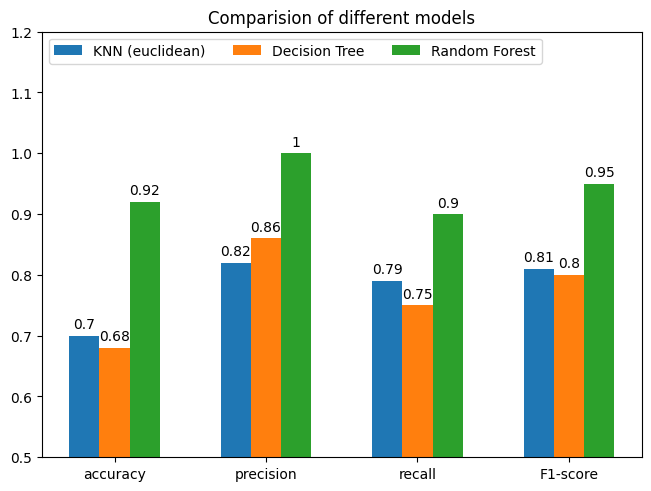

In [45]:

names = ['accuracy', 'precision', 'recall', 'F1-score']
values = {
  "KNN (euclidean)" : (cfm_euclidean.accuracy,cfm_euclidean.precision,cfm_euclidean.recall, cfm_euclidean.F1_score),
  "Decision Tree" : (cfm_decisionTree.accuracy,cfm_decisionTree.precision,cfm_decisionTree.recall, cfm_decisionTree.F1_score),
  "Random Forest" : (cfm_randomForest.accuracy,cfm_randomForest.precision,cfm_randomForest.recall, cfm_randomForest.F1_score),
}
r = 2

values = {k: (round(v[0],r), round(v[1],r), round(v[2],r), round(v[3], r)) for k, v in values.items()}

fig, ax = plt.subplots(layout='constrained')
x = np.arange(len(names))
width = 0.2
multiplier = 0

for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_title('Comparision of different models')
ax.set_xticks(x + width, names)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0.5, 1.2)


plt.show()

In conclusion Random Forest performed the best on the given dataset